Install Library

In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import

In [2]:
import pandas as pd
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

Read file

In [3]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/Data/logtest.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [4]:
blocks = text.split('-------------')
sec = 0
data = []
for block in blocks:
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    roll, pitch     = map(float, mag.split(','))
    mx = roll
    my = pitch
    if sec == 0:
        fmx = mx
        fmy = my
        mx = 0
        my = 0
    else:
        mx = abs(mx) - abs(fmx)
        my = abs(my) - abs(fmy)
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Roll': roll,
        'Pitch': pitch,
        'Tilted_x': mx,
        'Tilted_y': my,
        'RSSI': rssi
    })
    sec += 1

Data Fram

In [5]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,0,2025-05-25 15:12:46,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.33,1007.88,44.84,44.85,0.09,-3.87,9.36,-0.74,-1.50,1.56,-22.47,-0.51,0.00,0.00,-49
1,1,2025-05-25 15:12:47,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.33,1007.87,44.93,44.84,0.11,-3.91,9.37,-0.91,-1.66,1.48,-22.67,-0.59,0.20,0.08,-47
2,2,2025-05-25 15:12:48,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.32,1007.86,44.96,44.82,0.07,-3.87,9.28,-0.86,-1.53,1.46,-22.63,-0.42,0.16,-0.09,-49
3,3,2025-05-25 15:12:49,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.31,1007.87,44.91,44.81,0.10,-3.78,9.38,-0.85,-1.65,1.21,-21.94,-0.54,-0.53,0.03,-48
4,4,2025-05-25 15:12:51,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.31,1007.90,44.60,44.75,0.00,-3.98,9.41,-0.76,-1.85,1.91,-22.94,0.00,0.47,-0.51,-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,657,2025-05-25 15:25:56,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.75,45.85,43.66,2.27,1.09,9.93,-0.81,-1.54,1.21,6.29,-12.80,-16.18,12.29,-45
658,658,2025-05-25 15:25:57,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.73,46.02,43.64,2.24,1.19,9.77,-0.79,-1.66,1.35,6.92,-12.84,-15.55,12.33,-45
659,659,2025-05-25 15:25:58,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.27,1007.78,45.61,43.63,2.32,1.16,9.84,-0.79,-1.48,1.50,6.73,-13.17,-15.74,12.66,-44
660,660,2025-05-25 15:26:00,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.78,45.61,43.61,2.25,1.18,9.82,-0.95,-1.58,1.51,6.85,-12.80,-15.62,12.29,-44


Plot graph

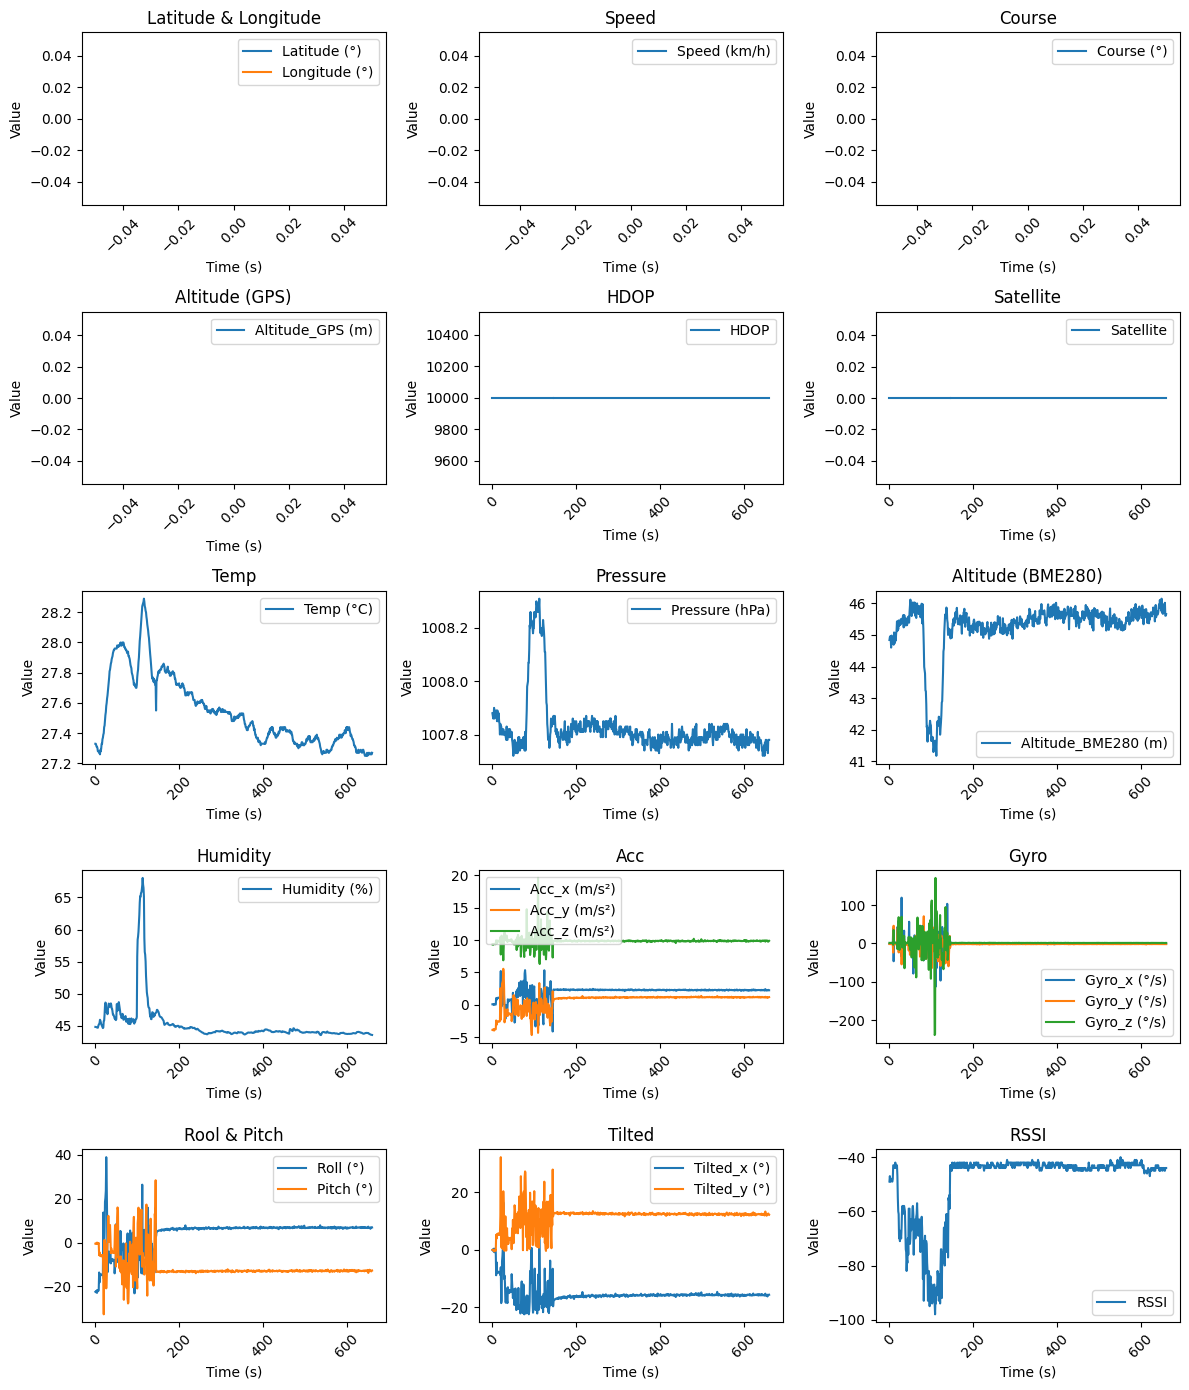

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3,figsize=(12, 14))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(df['second'], df['Latitude'], label='Latitude (°)')
ax1.plot(df['second'], df['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(df['second'], df['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(df['second'], df['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(df['second'], df['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(df['second'], df['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(df['second'], df['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(df['second'], df['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(df['second'], df['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(df['second'], df['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(df['second'], df['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(df['second'], df['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(df['second'], df['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(df['second'], df['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(df['second'], df['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(df['second'], df['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch
ax13.plot(df['second'], df['Roll'], label='Roll (°)')
ax13.plot(df['second'], df['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(df['second'], df['Tilted_x'], label='Tilted_x (°)')
ax14.plot(df['second'], df['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

# RSSI
ax15.plot(df['second'], df['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()
